In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv(r'C:\Users\HP\Documents\Projects\US_TECH_TOP50_COMPANIES\US_TECH_COMPANIES.csv',)
data.head()

In [9]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Company Name                                      50 non-null     object 
 1   Industry                                          50 non-null     object 
 2   Sector                                            50 non-null     object 
 3   HQ State                                          50 non-null     object 
 4   Founding Year                                     50 non-null     int64  
 5   Annual Revenue 2022-2023 (USD in Billions)        50 non-null     float64
 6   Market Cap (USD in Trillions)                     50 non-null     float64
 7   Stock Name                                        50 non-null     object 
 8   Annual Income Tax in 2022-2023 (USD in Billions)  50 non-null     float64
 9   Employee Size          

(50, 10)

In [ ]:
data.describe()

In [7]:
sort_employee_size = data.sort_values(by=['Employee Size'], ascending=True)
sort_revenue = data.sort_values(by=['Annual Revenue 2022-2023 (USD in Billions)'], ascending=False)
sort_revenue.head()

,Company Name,Industry,Sector,HQ State,Founding Year,Annual Revenue 2022-2023 (USD in Billions),Market Cap (USD in Trillions),Stock Name,Annual Income Tax in 2022-2023 (USD in Billions),Employee Size
3,Amazon,Technology,Software Application,Washington,1905,513.98,1.030,AMZN,-3.217,1541000
0,Apple Inc.,Technology,Consumer Electronics,California,1905,387.53,2.520,AAPL,18.314,164000
2,Alphabet (Google),Technology,Software Infrastructure,California,1905,282.83,1.350,GOOG,11.356,190234
1,Microsoft Corporation,Technology,Software Infrastructure,Washington,1905,204.09,2.037,MSFT,15.139,221000
6,Meta Platforms,Technology,Software Infrastructure,California,1905,116.60,0.524,META,5.619,86482


In [ ]:
data.loc[data['Annual Revenue 2022-2023 (USD in Billions)'] > 100]


In [ ]:
df = pd.read_csv(r'C:\Users\HP\Documents\Projects\US_TECH_TOP50_COMPANIES\US_TECH_COMPANIES.csv', index_col='HQ State')
df

In [ ]:
data['HQ State'].mode()
data['HQ State'].value_counts()

<Axes: >

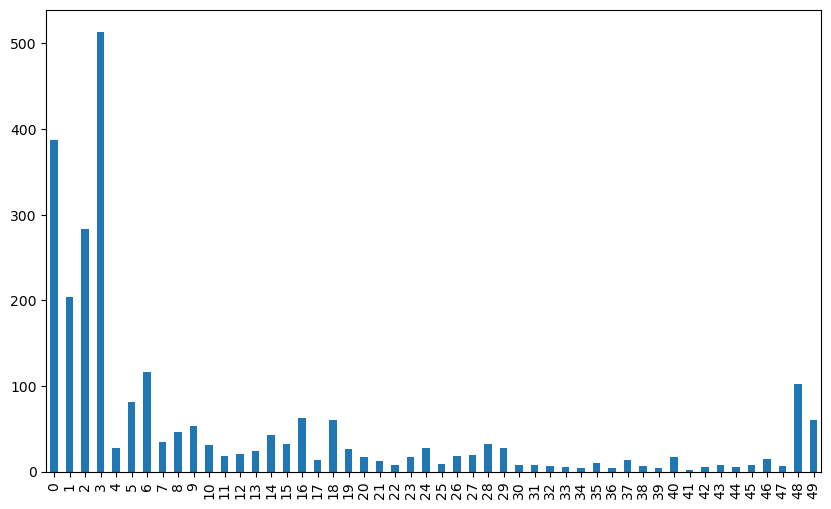

In [23]:
data['Annual Revenue 2022-2023 (USD in Billions)'].plot(kind='bar', figsize=(10,6), x ='Company Name')

In [ ]:
data.query(" `HQ State` == 'California' and `Sector` == 'Software Infrastructure'")

In [36]:
def plotBarPlot(variable1, constraint1, constraint2,labelx, labely, title):
    plt.figure(figsize=(10, 6))
    bars = plt.barh(variable1[constraint1], variable1[constraint2], color='skyblue', edgecolor='none')
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert the y-axis to display the largest company at the top

    for bar in bars:
        width = bar.get_width()
        label_x = width + 500  # Adjust the position of the label
        plt.text(label_x, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', fontsize=12)
        
    plt.show()  
    

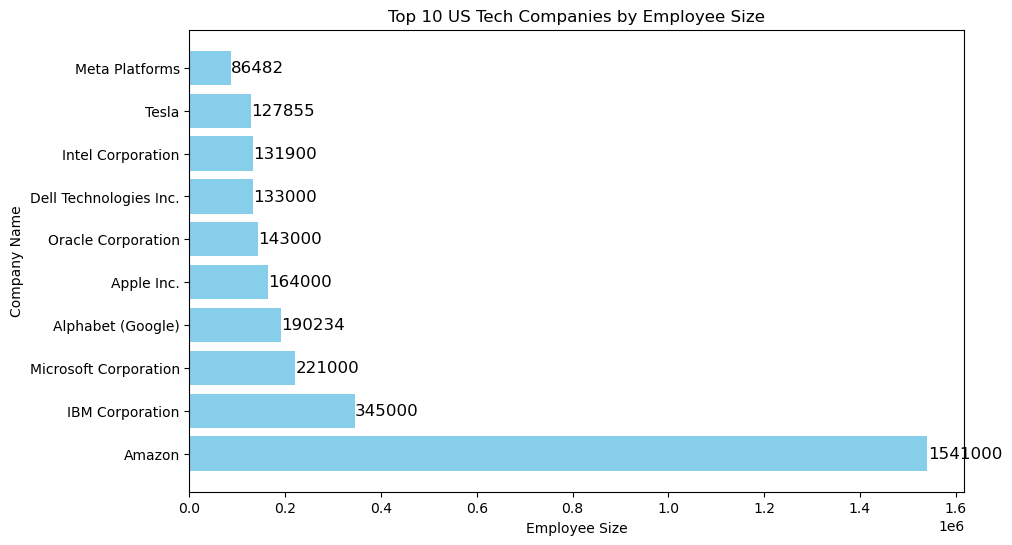

In [37]:
top_10_employee = sort_employee_size[-10:]
plotBarPlot(top_10_employee,'Company Name', 'Employee Size', 'Employee Size', 'Company Name','Top 10 US Tech Companies by Employee Size')


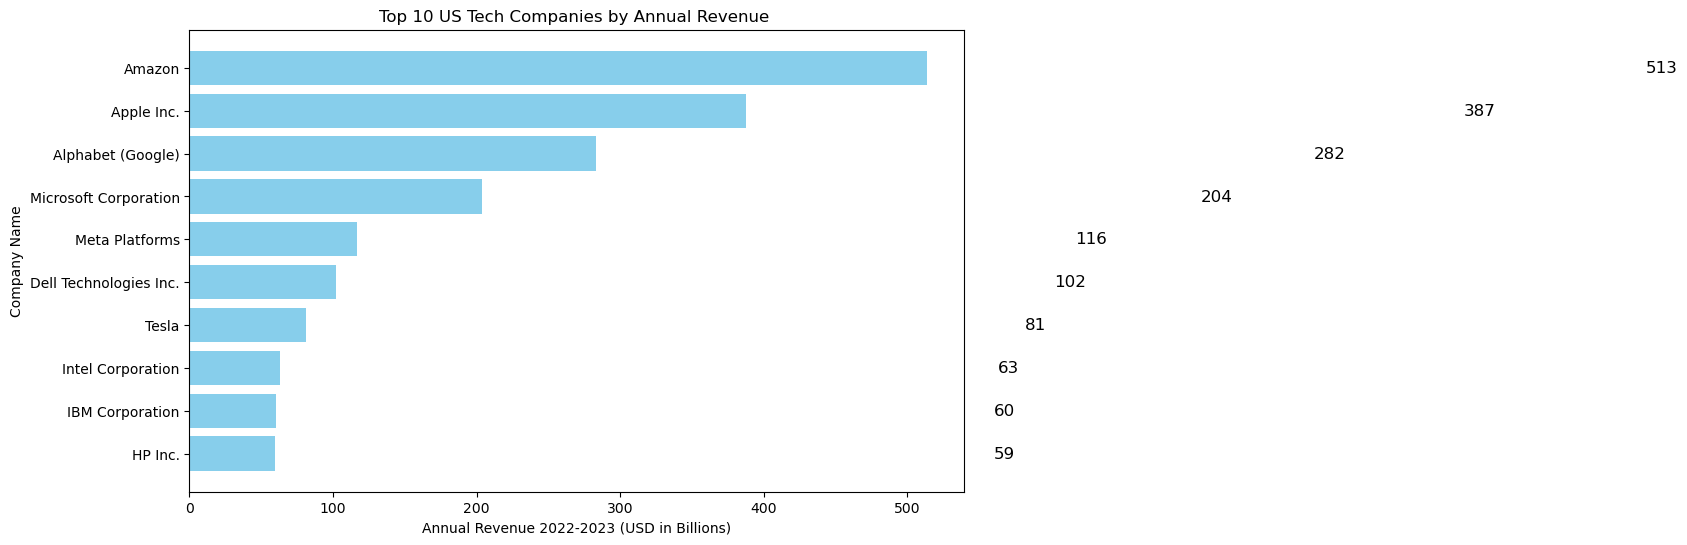

In [67]:
top10_revenue = sort_revenue[:10]
top10_revenue
plotBarPlot(top10_revenue,'Company Name', 'Annual Revenue 2022-2023 (USD in Billions)', 'Annual Revenue 2022-2023 (USD in Billions)', 'Company Name','Top 10 US Tech Companies by Annual Revenue ')

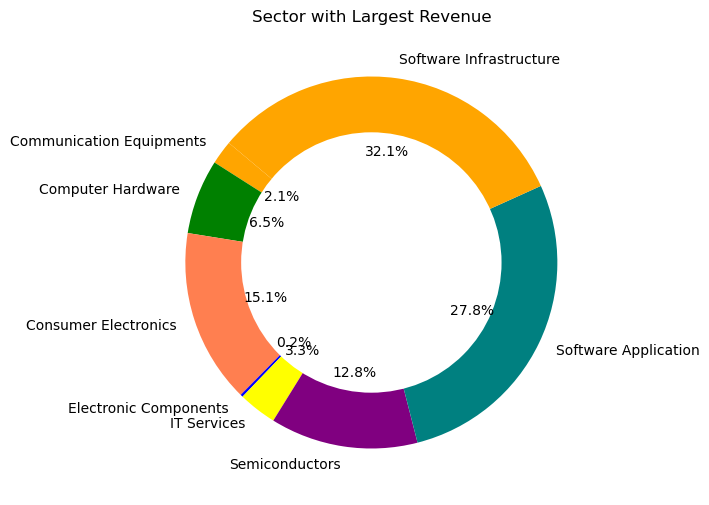

In [66]:

# Step 3: Group and aggregate data by 'Sector' and calculate total annual revenue
sector_revenue = data.groupby('Sector')['Annual Revenue 2022-2023 (USD in Billions)'].sum().reset_index()

# Step 4: Find the largest sector (sector with the highest total annual revenue)
largest_sector = sector_revenue.loc[sector_revenue['Annual Revenue 2022-2023 (USD in Billions)'].idxmax()]

# Step 5: Create the pie chart
plt.figure(figsize=(6, 8))
plt.pie(sector_revenue['Annual Revenue 2022-2023 (USD in Billions)'], labels=sector_revenue['Sector'], autopct='%1.1f%%', startangle=140, colors=['orange', 'green', 'coral','blue', 'yellow','purple', 'teal'])


circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(circle)

# Add a title that includes the largest sector
plt.title('Sector with Largest Revenue')

# Show the pie chart
plt.show()



Text(0.5, 1.0, 'Sector with Most Companies: Software Application')

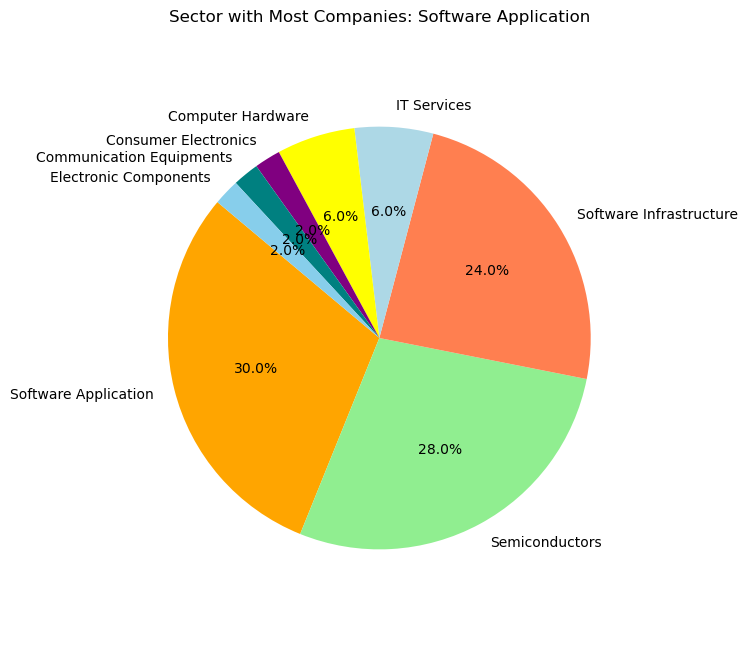

In [62]:
# Count the number of companies in each sector
sector_counts = data['Sector'].value_counts()

# Find the sector with the most companies
largest_sector = sector_counts.idxmax()

# Create a pie chart to visualize the largest sector by company count
plt.figure(figsize=(6, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140 ,colors=['orange', 'lightgreen', 'coral','lightblue', 'yellow','purple', 'teal','skyblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title that includes the largest sector
plt.title(f'Sector with Most Companies: {largest_sector}')